In [90]:
import pandas as pd
df = pd.read_csv("C:\\Users\\guiso\\Documents\\GitHub\\ml\\datasets\\car_price_dataset.csv")
df.head(10)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
5,Toyota,Camry,2007,2.7,Petrol,Automatic,157889,4,4,7242
6,Honda,Civic,2010,3.4,Electric,Automatic,139584,3,1,11208
7,Kia,Sportage,2001,4.7,Electric,Semi-Automatic,157495,2,2,7950
8,Kia,Sportage,2014,2.6,Hybrid,Manual,98700,3,4,9926
9,Toyota,RAV4,2005,3.1,Petrol,Manual,107724,2,5,6545


In [91]:
df.count()

Brand           10000
Model           10000
Year            10000
Engine_Size     10000
Fuel_Type       10000
Transmission    10000
Mileage         10000
Doors           10000
Owner_Count     10000
Price           10000
dtype: int64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Engine_Size'}>],
       [<Axes: title={'center': 'Mileage'}>,
        <Axes: title={'center': 'Doors'}>],
       [<Axes: title={'center': 'Owner_Count'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

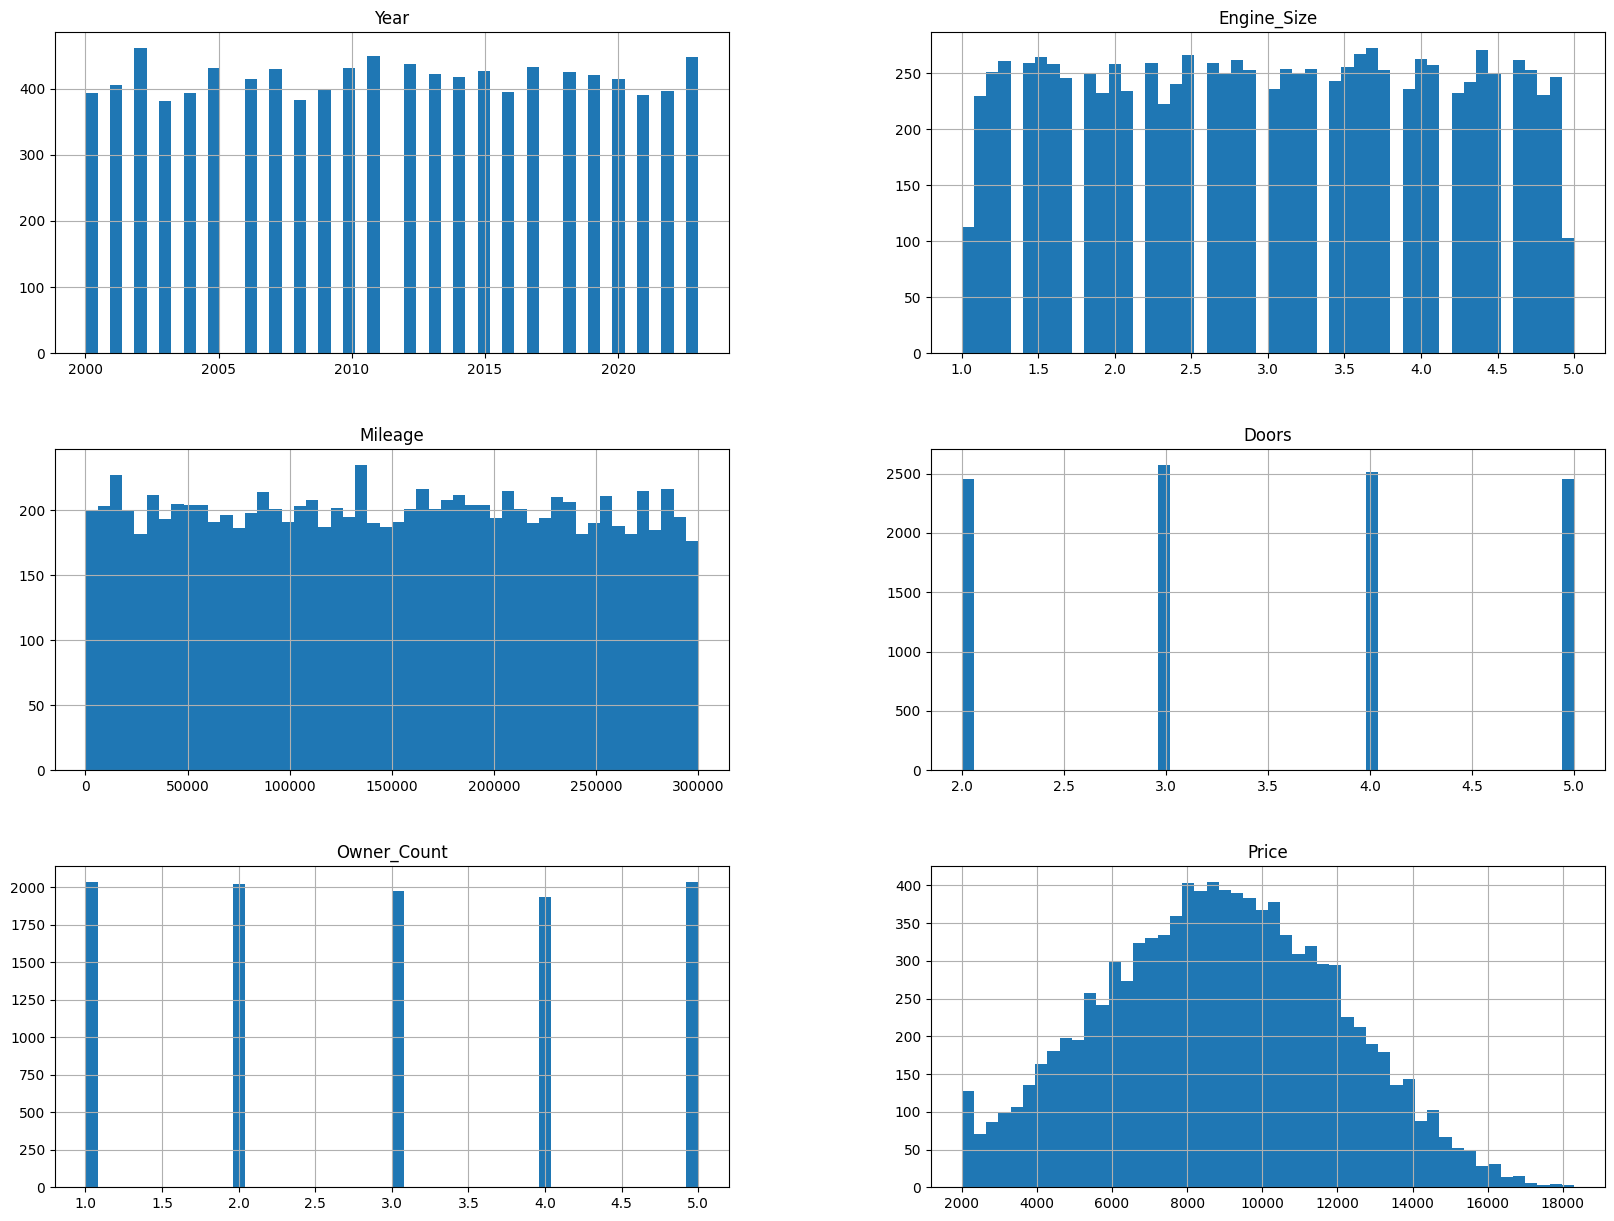

In [93]:
df.hist(bins=50, figsize=(20,15))

<Axes: >

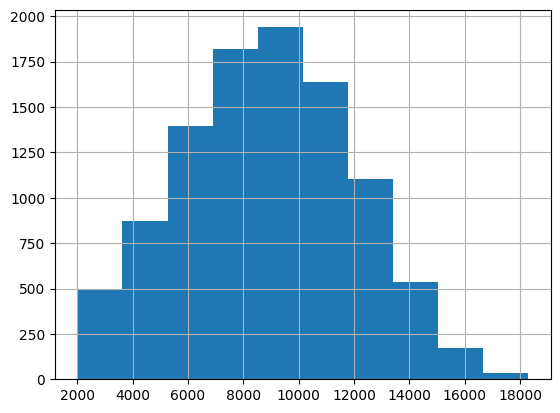

In [94]:
df["price_cat"] = pd.cut(df["Price"], bins=[0, 5000, 8000, 11000, 14000, np.inf], labels=[1,2,3,4,5])

df["Price"].hist()

<Axes: >

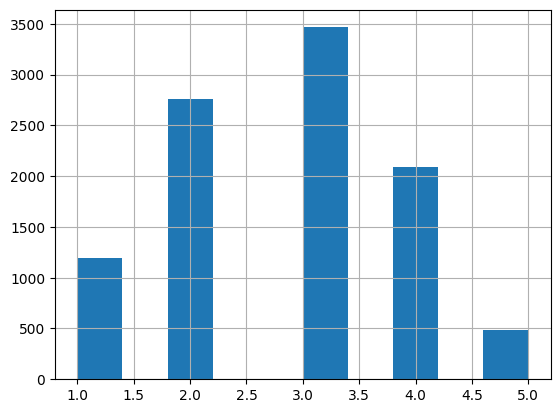

In [95]:
df["price_cat"].hist()

In [96]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(df, df["price_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [97]:
strat_test_set["price_cat"].value_counts()/len(strat_test_set)

price_cat
3    0.3465
2    0.2760
4    0.2095
1    0.1195
5    0.0485
Name: count, dtype: float64

In [98]:
for set_ in (strat_test_set, strat_train_set):
    set_.drop("price_cat", axis=1, inplace=True)

In [99]:
testes = strat_train_set.copy()

In [100]:
df = strat_train_set.drop(["Price"], axis=1)
df_labels = strat_train_set["Price"].copy()

In [101]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
df_cat = df[["Transmission", "Fuel_Type", "Model", "Brand"]]
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 32000 stored elements and shape (8000, 47)>

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
num_attribs = ["Engine_Size", "Owner_Count", "Mileage", "Year", "Doors"]
cat_attribs = ["Transmission", "Fuel_Type", "Model", "Brand"]
full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])
df_prepared = full_pipeline.fit_transform(df)

In [103]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_labels)

LinearRegression()

In [104]:
from sklearn.metrics import mean_squared_error
df_predictions = lin_reg.predict(df_prepared)
lin_mse = mean_squared_error(df_labels, df_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(77.81164729898181)